In [118]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [119]:
user_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/dataset/3_user_data.csv', encoding = 'windows-1251')

In [120]:
logs = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-ababkov/dataset/3_logs.csv', encoding = 'windows-1251')

In [135]:
#Какой клиент совершил больше всего успешных операций?
client_success = logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success' : 'count'}) \
    .sort_values('success') \
    .query('success == 41') \
    .sort_values('client')

In [122]:
#С какой платформы осуществляется наибольшее количество успешных операций?
platform_success = logs.query('success == True') \
    .groupby('platform', as_index = False) \
    .agg({'success' : 'count'}) \
    .sort_values('success')

In [123]:
#Какая платформа наиболее популярна среди премиумных клиентов?
premium_client_platform = logs.merge(user_data, on = 'client') \
    .groupby(['premium', 'platform', 'age'], as_index = False) \
    .agg({'client' : 'count'}) \
    .query('premium == True')

In [124]:
logs = logs.merge(user_data, how='inner', on='client')

In [153]:
#Число успешных клиентов
count_success_ = logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success' : 'count'}) \

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


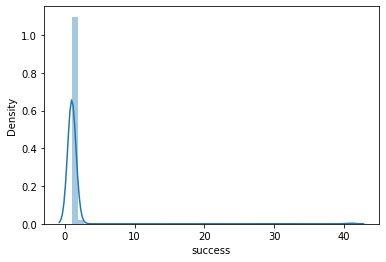

In [154]:
#График распределения числа успешных операций
sns.distplot(count_success_.success, kde=True)

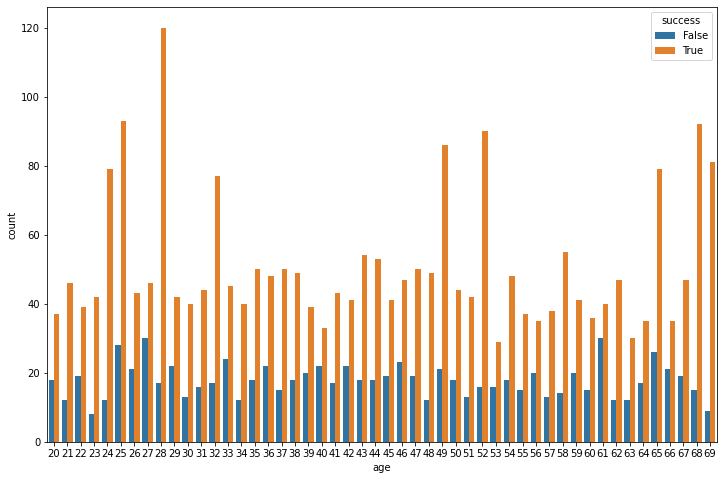

In [155]:
#Число успешных операций, сделанных на платформе computer, в зависимости от возраста
plt.figure(figsize=(12, 8))
sns.countplot(data=logs, x="age", hue="success")

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


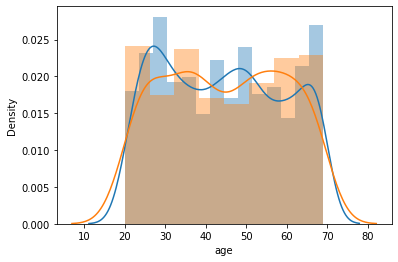

In [129]:
#Распределение возраста клиентов в зависимости от типа клиента (обычный или премиум)
sns.distplot(logs.query('premium == False').age) 
sns.distplot(logs.query('premium == True').age)